# Multi-layer Perceptron

## Lab-Assignment 6

    - V.VISHNU DUT
    - 16BCE1103



## Dataset: 

Given dataset is the wheatSeed dataset which has the following column 

- area 
- perimeter
- compactness
- lengthOfKernel
- widthOfKernel
- asymmetryCoefficient
- lengthOfKernelGroove
- TypeOfWheatSeed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
col_Names=["area", "perimeter", "compactness", "lengthOfKernel", "widthOfKernel", "asymmetryCoefficient", "lengthOfKernelGroove", "TypeOfWheatSeed"]
data = pd.read_csv("seeds_dataset.csv",names=col_Names, header = None)

In [3]:
data.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,TypeOfWheatSeed
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
data.isnull().any()

area                    False
perimeter               False
compactness             False
lengthOfKernel          False
widthOfKernel           False
asymmetryCoefficient    False
lengthOfKernelGroove    False
TypeOfWheatSeed         False
dtype: bool

In [5]:
X = data[["area","perimeter","compactness","lengthOfKernel","widthOfKernel","asymmetryCoefficient","lengthOfKernelGroove"]].values

In [6]:
Y = data["TypeOfWheatSeed"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
mlpSeed = MLPClassifier(hidden_layer_sizes = (13,13,13), max_iter = 500)

In [10]:
mlpSeed.fit(X_train, y_train)   

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [11]:
#printing each layers final weights
for i,j in enumerate(mlpSeed.coefs_):
    print("Final Weights for %d layer:\n" %(i+1))
    for ind,val in enumerate(j):
        print("Weights for %d neuron:" %(ind+1))
        print(val)

Final Weights for 1 layer:

Weights for 1 neuron:
[ 0.05037036  0.48073998  0.25986252 -0.02404493 -0.4137057   0.07858686
  0.02031089 -0.55035207 -0.35798105 -0.55522485  0.42878139 -0.2391529
  0.5061455 ]
Weights for 2 neuron:
[ 0.39027587 -0.40568775  0.21915982 -0.41001615  0.06430165  0.48918334
  0.41406191 -0.23905137 -0.09350161 -0.06484931  0.25420136  0.18222067
  0.05793746]
Weights for 3 neuron:
[-0.10638308  0.18912971  0.53132688  0.12895254  0.38068994  0.35235012
 -0.39480102  0.65177609 -0.64555403 -0.52898776  0.63838925 -0.59622298
 -0.19358059]
Weights for 4 neuron:
[-0.23627274 -0.16023957  0.44905009  0.39303171 -0.29020374  0.55466832
  0.30452571  0.60159087 -0.55573631  0.02032076 -0.28292764 -0.23749191
  0.47670155]
Weights for 5 neuron:
[ 0.09091536  0.54781303  0.02043446 -0.36409188  0.2718016   0.2903459
  0.31419198  0.16522831 -0.01777328  0.16631524  0.47438277 -0.71750675
  0.20000005]
Weights for 6 neuron:
[-0.71803734  0.44417748 -0.1029692   0.38

In [12]:
predictions = mlpSeed.predict(X_test)

In [13]:
print("Accuracy of predictions: %.2f" %(accuracy_score(y_test, predictions) * 100))
print("Classification Report for the MLP: ")
print(classification_report(y_test, predictions))

Accuracy of predictions: 92.86
Classification Report for the MLP: 
             precision    recall  f1-score   support

          1       0.81      1.00      0.90        13
          2       1.00      0.81      0.90        16
          3       1.00      1.00      1.00        13

avg / total       0.94      0.93      0.93        42



## Accuracy/Epoch

In [14]:
graphy=[]
graphx=[]
for epoch in range(250,10000,250):
    mlp = MLPClassifier(hidden_layer_sizes = (15,20,15), max_iter = epoch)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    graphy.append(accuracy_score(predictions, y_test))
    graphx.append(epoch)

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
d= {'Epoch': graphx,'Accuracy':graphy}

Text(0.5,0,'Epoch')

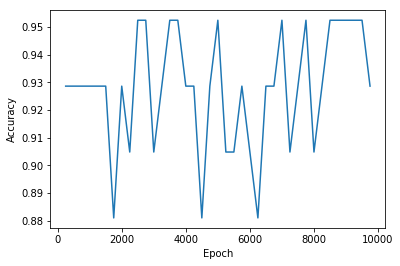

In [16]:
plt.plot("Epoch","Accuracy",data=d)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [17]:
print("Number of epoches  accuracy")
for i in range(0,len(graphx)):
    print(graphx[i],"\t",graphy[i])

Number of epoches  accuracy
250 	 0.9285714285714286
500 	 0.9285714285714286
750 	 0.9285714285714286
1000 	 0.9285714285714286
1250 	 0.9285714285714286
1500 	 0.9285714285714286
1750 	 0.8809523809523809
2000 	 0.9285714285714286
2250 	 0.9047619047619048
2500 	 0.9523809523809523
2750 	 0.9523809523809523
3000 	 0.9047619047619048
3250 	 0.9285714285714286
3500 	 0.9523809523809523
3750 	 0.9523809523809523
4000 	 0.9285714285714286
4250 	 0.9285714285714286
4500 	 0.8809523809523809
4750 	 0.9285714285714286
5000 	 0.9523809523809523
5250 	 0.9047619047619048
5500 	 0.9047619047619048
5750 	 0.9285714285714286
6000 	 0.9047619047619048
6250 	 0.8809523809523809
6500 	 0.9285714285714286
6750 	 0.9285714285714286
7000 	 0.9523809523809523
7250 	 0.9047619047619048
7500 	 0.9285714285714286
7750 	 0.9523809523809523
8000 	 0.9047619047619048
8250 	 0.9285714285714286
8500 	 0.9523809523809523
8750 	 0.9523809523809523
9000 	 0.9523809523809523
9250 	 0.9523809523809523
9500 	 0.9523

### We an now clearly see that the accuracy is changing based on number of epochs
### We now try changing the number of nodes

In [18]:
graphy=[]
graphx=[]
for nodes in range(1,20,1):
    mlp = MLPClassifier(hidden_layer_sizes = (nodes,nodes,nodes), max_iter = 5000)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    graphy.append(accuracy_score(predictions, y_test))
    graphx.append(nodes)

Text(0.5,0,'Node')

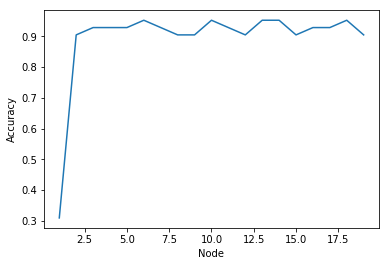

In [19]:
plt.plot(graphx,graphy)
plt.ylabel('Accuracy')
plt.xlabel('Node')

In [20]:
print("Number of nodes  accuracy")
for i in range(0,len(graphx)):
    print(graphx[i],"\t",graphy[i])

Number of nodes  accuracy
1 	 0.30952380952380953
2 	 0.9047619047619048
3 	 0.9285714285714286
4 	 0.9285714285714286
5 	 0.9285714285714286
6 	 0.9523809523809523
7 	 0.9285714285714286
8 	 0.9047619047619048
9 	 0.9047619047619048
10 	 0.9523809523809523
11 	 0.9285714285714286
12 	 0.9047619047619048
13 	 0.9523809523809523
14 	 0.9523809523809523
15 	 0.9047619047619048
16 	 0.9285714285714286
17 	 0.9285714285714286
18 	 0.9523809523809523
19 	 0.9047619047619048


### Now we'll try to add more layers to this and see how our accuracy stands up

Now each layers will have 5 nurons/nodes

In [21]:
graphy=[]
graphx=[]
layers=[5]
for nodes in range(1,10,1):
    mlp = MLPClassifier(hidden_layer_sizes = (layers), max_iter = 5000)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    graphy.append(accuracy_score(predictions, y_test))
    graphx.append(len(layers))
    layers.append(5)

Text(0.5,0,'Layers')

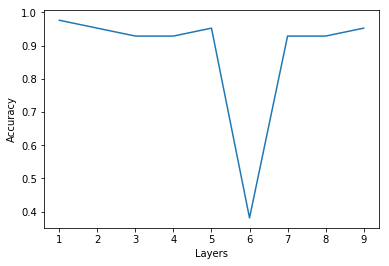

In [22]:
plt.plot(graphx,graphy)
plt.ylabel('Accuracy')
plt.xlabel('Layers')

In [23]:
print("Layers  accuracy")
for i in range(0,len(graphx)):
    print(graphx[i],"\t",graphy[i])

Layers  accuracy
1 	 0.9761904761904762
2 	 0.9523809523809523
3 	 0.9285714285714286
4 	 0.9285714285714286
5 	 0.9523809523809523
6 	 0.38095238095238093
7 	 0.9285714285714286
8 	 0.9285714285714286
9 	 0.9523809523809523
